# Session 14: Gradient Descent for Multivariate Linear Regression

In this session, we will:

1. Learn the basics of **NumPy** for numerical computing
2. Understand **gradient descent** optimization
3. Implement **multivariate linear regression** from scratch


---

## Part 1: Introduction to NumPy

NumPy is the fundamental package for numerical computing in Python. It provides:

- N-dimensional arrays (`ndarray`)
- Broadcasting for element-wise operations
- Linear algebra operations
- Mathematical functions optimized for arrays


In [2]:
import numpy as np

alias


### 1.1 Creating Arrays


In [4]:
# From Python lists
arr1 = np.array([-1, 2, 3, 4, 5], dtype=np.int8)
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}")
print(f"Dtype: {arr1.dtype}")

1D array: [-1  2  3  4  5]
Shape: (5,)
Dtype: int8


In [ ]:
# 2D array (matrix)
arr2 = np.array([[1, 2, 3],
                 [4, 5, 6]])
print(f"2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")  # (rows, columns)

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [ ]:
# Common array creation functions
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
# 3x3 matrix of random values (normal distribution)
random = np.random.randn(3, 3)
arange = np.arange(0, 10, 2)   # [0, 2, 4, 6, 8]
linspace = np.linspace(0, 1, 5)  # 5 evenly spaced values from 0 to 1

print(f"zeros:\n{zeros}\n")
print(f"ones:\n{ones}\n")
print(f"random:\n{random}\n")
print(f"arange: {arange}")
print(f"linspace: {linspace}")

zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
[[1. 1. 1.]
 [1. 1. 1.]]

random:
[[-0.26870188 -0.37644014 -1.15308419]
 [-0.22421846  0.77504234 -0.86618435]
 [ 0.44210977  1.00358155  0.33789688]]

arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Array Operations and Broadcasting

NumPy operations are **element-wise** by default. Broadcasting allows operations between arrays of different shapes.


In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"a + b = {a + b}")      # Element-wise addition
print(f"a * b = {a * b}")      # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")    # Element-wise power
print(f"a * 10 = {a * 10}")    # Broadcasting: scalar applied to all elements

a + b = [5 7 9]
a * b = [ 4 10 18]
a ** 2 = [1 4 9]
a * 10 = [10 20 30]


In [ ]:
# Broadcasting with 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
row_vector = np.array([10, 20, 30])

"""
[[10, 20, 30],
[10, 20 ,30]]
"""

# The row vector is "broadcast" to each row of the matrix
result = matrix + row_vector
print(f"Matrix + row_vector:\n{result}")

Matrix + row_vector:
[[11 22 33]
 [14 25 36]]


### 1.3 Matrix Operations

For linear regression, we need matrix multiplication and transpose.


In [ ]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# Matrix multiplication (dot product)
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"\nnp.dot(A, B):\n{np.dot(A, B)}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

A @ B (matrix multiplication):
[[19 22]
 [43 50]]

np.dot(A, B):
[[19 22]
 [43 50]]

A.T (transpose):
[[1 3]
 [2 4]]


### 1.4 Useful Aggregation Functions


In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(f"Sum all: {np.sum(arr)}")
print(f"Sum along rows (axis=1): {np.sum(arr, axis=1)}")
print(f"Sum along columns (axis=0): {np.sum(arr, axis=0)}")
print(f"Mean: {np.mean(arr)}")
print(f"Std: {np.std(arr)}")

Sum all: 21
Sum along rows (axis=1): [ 6 15]
Sum along columns (axis=0): [5 7 9]
Mean: 3.5
Std: 1.707825127659933


---

## Part 2: Linear Regression Review

### What is Linear Regression?

Linear regression models the relationship between features $X$ and target $y$ as:

$$\hat{y} = X \cdot w + b$$

Where:

- $X$ is the feature matrix of shape `(n_samples, n_features)`
- $w$ is the weight vector of shape `(n_features,)`
- $b$ is the bias (intercept) scalar
- $\hat{y}$ is the predicted values

### The Goal

Find $w$ and $b$ that minimize the **Mean Squared Error (MSE)**:

$$\mathcal{L} = MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$


### Gradients for Linear Regression

For MSE loss with linear regression, the gradients are:

$$\nabla_w \mathcal{L} = \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial MSE}{\partial w} = \frac{2}{n}  (\hat{y} - y) X$$

$$\nabla_b \mathcal{L} = \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum(\hat{y} - y)$$

Let's derive this step by step:

1. $MSE = \frac{1}{n}\sum(\hat{y} - y)^2 = \frac{1}{n}\sum(Xw + b - y)^2$

2. Using chain rule: $\frac{\partial MSE}{\partial w} = \frac{2}{n} \cdot (Xw + b - y) \cdot X$

3. In matrix form: $\frac{\partial MSE}{\partial w} = \frac{2}{n} (\hat{y} - y) X$


---

## Part 3: Gradient Descent

### What is Gradient Descent?

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function.

Think of it like descending a mountain in fog - you can only feel the slope at your current position, so you take small steps in the steepest downward direction.

### The Update Rule

$$w_{new} = w_{old} - \alpha \cdot \nabla_w \mathcal{L} = w_{old} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w} $$

Where $\alpha$ is the **learning rate** - how big of a step we take.


---

## Part 4: Implementation from Scratch

Let's build our linear regression step by step.


In [11]:
# First, let's create some synthetic data
np.random.seed(42)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# Generate target with some noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0


### 4.1 Core Functions


### In-class Task


Write `predict()`, `compute_mse()`, `compute_gradients()`, which perform neccessary operations for gradient descent.


In [7]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Compute predictions for linear regression.

    Args:
        X: Feature matrix of shape (n_samples, n_features)
        w: Weight vector of shape (n_features,)
        b: Bias scalar

    Returns:
        Predictions of shape (n_samples,)
    """
    return X @ w + b

In [6]:
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute Mean Squared Error.

    Args:
        y_true: Actual target values
        y_pred: Predicted values

    Returns:
        MSE loss value
    """
    return np.mean((y_pred - y_true) ** 2)

In [8]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.

    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: True target values
        y_pred: Predicted values

    Returns:
        Tuple of (gradient_w, gradient_b)
    """
    n = len(X)
    grad_w = (2 / n) * ((y_pred - y) @ X)
    grad_b = (2 / n) * np.sum((y_pred - y))
    return grad_w, grad_b

### Compute first gradient


In [ ]:
w = np.random.randn(3)
b = 0.0
X.shape, w.shape, b

((1000, 3), (3,), 0.0)

In [15]:
y_pred = predict(X, w, b)  # Initial predictions
# Should print gradients (grad_w, grad_b)
print(compute_gradients(X, y, y_pred))

(array([-9.63805501,  6.22101998, -3.9012661 ]), np.float64(-10.719867319459937))


Can you observe what happen?


### 4.2 Training Loop


In [35]:
def train_linear_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step=25,
) -> tuple:
    """
    Train linear regression using gradient descent.

    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: Target values of shape (n_samples,)
        learning_rate: Step size for gradient descent
        n_iterations: Number of training iterations
        verbose: Whether to print progress
        log_every_n_step: Number of steps to log the result

    Returns:
        Tuple of (final_weights, final_bias, loss_history)
    """
    n_samples, n_features = X.shape

    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []

    for i in range(n_iterations):
        y_pred = predict(X, w, b)
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

        # if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
        #     print(f"Iteration {i:4d} | Loss: {loss:.6f}")

    return w, b, loss_history

In [23]:
# Train the model
learned_w, learned_b, losses = train_linear_regression(
    X, y,
    learning_rate=0.01,
    n_iterations=500
)

Iteration    0 | Loss: 45.786696
Iteration   25 | Loss: 16.037265
Iteration   50 | Loss: 5.734739
Iteration   75 | Loss: 2.163298
Iteration  100 | Loss: 0.923821
Iteration  125 | Loss: 0.493101
Iteration  150 | Loss: 0.343205
Iteration  175 | Loss: 0.290952
Iteration  200 | Loss: 0.272703
Iteration  225 | Loss: 0.266316
Iteration  250 | Loss: 0.264075
Iteration  275 | Loss: 0.263286
Iteration  300 | Loss: 0.263008
Iteration  325 | Loss: 0.262910
Iteration  350 | Loss: 0.262875
Iteration  375 | Loss: 0.262862
Iteration  400 | Loss: 0.262858
Iteration  425 | Loss: 0.262856
Iteration  450 | Loss: 0.262856
Iteration  475 | Loss: 0.262856
Iteration  499 | Loss: 0.262855


In [24]:
# Compare learned parameters with true parameters
print("\n=== Results ===")
print(f"True weights:    {true_weights}")
print(f"Learned weights: {learned_w}")
print(f"\nTrue bias:    {true_bias}")
print(f"Learned bias: {learned_b:.4f}")


=== Results ===
True weights:    [ 2.  -3.5  1.5]
Learned weights: [ 2.00857002 -3.5131732   1.48090698]

True bias:    5.0
Learned bias: 4.9908


Matplotlib is building the font cache; this may take a moment.


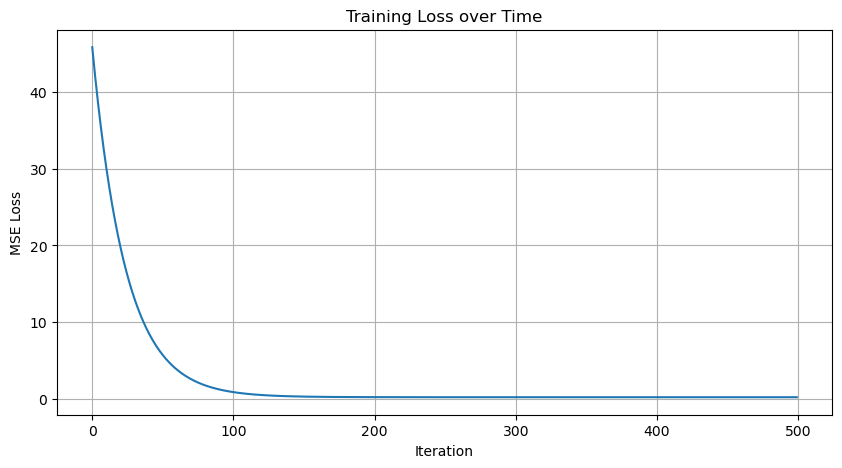

In [26]:
# Visualize the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

---

## Part 5: Feature Scaling

Gradient descent works much better when features are on similar scales. Let's see why and how to fix it.


This is statistical way to standarize any sameple of feature $i$ to a normal distribution:
$$X_i = \frac{x_i-\mu_i}{\sigma_i}$$
where $X_i$ is the column vector of raw data feature $i$


In [27]:
# Create data with very different scales
np.random.seed(42)
X_unscaled = np.column_stack([
    np.random.randn(500) * 1000,      # Feature 1: scale ~1000
    np.random.randn(500) * 0.001,     # Feature 2: scale ~0.001
    np.random.randn(500)              # Feature 3: scale ~1
])
y_unscaled = X_unscaled @ np.array([0.001, 1000, 1]) + \
    5 + np.random.randn(500) * 0.5

print(f"Feature ranges:")
for i in range(3):
    print(
        f"  Feature {i+1}: [{X_unscaled[:, i].min():.2f}, {X_unscaled[:, i].max():.2f}]")

Feature ranges:
  Feature 1: [-3241.27, 3852.73]
  Feature 2: [-0.00, 0.00]
  Feature 3: [-2.90, 2.60]


In [28]:
# This will likely fail or converge very slowly!
try:
    w_bad, b_bad, losses_bad = train_linear_regression(
        X_unscaled, y_unscaled, learning_rate=0.01, n_iterations=100
    )
except:
    print("Training failed due to numerical instability!")

Iteration    0 | Loss: 85.696115
Iteration   25 | Loss: 871155159202080805340365040358143631879229664798494767381715394830750039814045862849735767705550771108526879477364251653809771512373826652642481443263610550402662104844181197413872993691833211914127192672145978163200.000000
Iteration   50 | Loss: inf
Iteration   75 | Loss: nan
Iteration   99 | Loss: nan


/var/folders/fz/4wh_c63s2zdf_x3j9sybcz6m0000gn/T/ipykernel_99149/2889169837.py:12: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y_true) ** 2)
/opt/anaconda3/envs/python2-hsutcc/lib/python3.14/site-packages/numpy/_core/_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/fz/4wh_c63s2zdf_x3j9sybcz6m0000gn/T/ipykernel_99149/436678851.py:14: RuntimeWarning: overflow encountered in matmul
  grad_w = (2 / n) * ((y_pred - y) @ X)
/var/folders/fz/4wh_c63s2zdf_x3j9sybcz6m0000gn/T/ipykernel_99149/436678851.py:14: RuntimeWarning: invalid value encountered in matmul
  grad_w = (2 / n) * ((y_pred - y) @ X)
/opt/anaconda3/envs/python2-hsutcc/lib/python3.14/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/fz/4wh_c63s2zdf_x3j9sybcz6m0000gn/T/ipykernel_99149/2860131721.py

### Task: Implement standardize function


In [29]:
# Solution: Standardization (Z-score normalization)
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.

    Returns:
        Tuple of (X_standardized, mean, std)
    """
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1.0
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

In [ ]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(
        f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.1, n_iterations=500
)

print(f"True weights:    {[0.001, 1000, 1]}")
print(f"Learned weights: {w_good}")
print(f"\nTrue bias:    {5.0}")
print(f"Learned bias: {b_good:.4f}")
print(f"\nFinal Loss: {losses_good[-1]:.6f}")

Scaled feature ranges:
  Feature 1: [-3.31, 3.92]
  Feature 2: [-2.79, 2.66]
  Feature 3: [-2.98, 2.47]
True weights:    [0.001, 1000, 1]
Learned weights: [1.01072837 0.96936309 1.00073613]

True bias:    5.0
Learned bias: 5.1637

Final Loss: 0.240479


---

# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.


## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.

Benefits of mini-batch:

- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```


In [38]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.

    In each iteration:
      - randomly sample a subset of rows
      - compute predictions, loss, gradients on the mini-batch only
      - update w and b
    """

    n_samples, n_features = X.shape

    # Initialize parameters
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []

    for i in range(n_iterations):
        batch_idx = np.random.choice(n_samples, batch_size, replace=False)
        Xb = X[batch_idx]
        yb = y[batch_idx]

        y_pred_b = predict(Xb, w, b)
        loss = compute_mse(yb, y_pred_b)
        loss_history.append(loss)
        grad_w, grad_b = compute_gradients(Xb, yb, y_pred_b)

        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")

    return w, b, loss_history

In [39]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.01,
    n_iterations=200,
    log_every_n_step=50
)

Iteration    0 | Loss: 41.712871
Iteration   50 | Loss: 6.725149
Iteration  100 | Loss: 0.788649
Iteration  150 | Loss: 0.286194
Iteration  199 | Loss: 0.251438


## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:

- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant


In [ ]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',  # 'step', 'exponential', or 'inverse'
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
) -> tuple:
    """
    Train with learning rate scheduling.

    Implement at least one scheduling strategy.
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    learning_rate = initial_lr
    loss_history = []

    for t in range(n_iterations):
        if schedule == 'step':
            learning_rate = initial_lr * (0.9 ** (t // 100))
        elif schedule == 'exponential':
            learning_rate = initial_lr * np.exp(-decay_constant * t)
        elif schedule == 'inverse':
            learning_rate = initial_lr / (1 + decay_constant * t)
        else:
            raise ValueError(
                "Unknown schedule: choose 'step', 'exponential', or 'inverse'.")

        y_pred_b = predict(X, w, b)
        loss = compute_mse(y, y_pred_b)
        loss_history.append(loss)
        grad_w, grad_b = compute_gradients(X, y, y_pred_b)

        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

    return w, b, loss_history

In [47]:
# Test them all:
print("Step decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=500,
    decay_constant=0.0001
)
print(f"\nFinal Loss: {loss_history[-1]:.4f}\n\n")

print("Exponential decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=500,
    decay_constant=0.0001
)
print(f"\nFinal Loss: {loss_history[-1]:.4f}\n\n")

print("Inverse time decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=500,
    decay_constant=0.0001
)
print(f"\nFinal Loss: {loss_history[-1]:.4f}\n\n")

Step decay:

Final Loss: 0.2629


Exponential decay:

Final Loss: 0.2629


Inverse time decay:

Final Loss: 0.2629




## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$


In [ ]:
def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    """
    Compute Ridge regression loss (MSE + L2 regularization).

    Args:
        y_true: Actual target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength

    Returns:
        Ridge loss value
    """
    # Your code here
    pass


def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    """
    Compute gradients for Ridge regression.

    Args:
        X: Feature matrix
        y: True target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
        """
    # Your code here
    pass


def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,  # Regularization strength
    n_iterations: int = 1000
) -> tuple:
    """
    Train linear regression with L2 regularization.

    Hints:
    - Modify the loss calculation to include regularization term
    - Modify the gradient calculation for weights
    - Note: We typically don't regularize the bias term
    """
    # Your code here
    pass

In [ ]:
_, _, _ = train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:

1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.


In [ ]:
# Your code here